In [10]:
library(readxl)
library(ggplot2)
library(lubridate)

## Tarea 1

In [32]:
tarea1 <- read_excel("Lab3_Datos.xlsx", sheet="Tarea_1")
names(tarea1) <- c("Año", "Trimestre", "Ventas")
print(tarea1)

# A tibble: 12 × 3
     Año Trimestre Ventas
   <dbl> <chr>      <dbl>
 1  2021 I           20.2
 2  2021 II          33  
 3  2021 III         18.5
 4  2021 IV          21  
 5  2022 I           20.5
 6  2022 II          32  
 7  2022 III         20  
 8  2022 IV          19.5
 9  2023 I           20  
10  2023 II          33  
11  2023 III         19.5
12  2023 IV          20.5


#### 1. Si tuvieras que hacer las predicciones de ventas para los cuatro trimestres del año 2024 utilizando métodos no paramétricos, ¿qué métodos utilizarías?

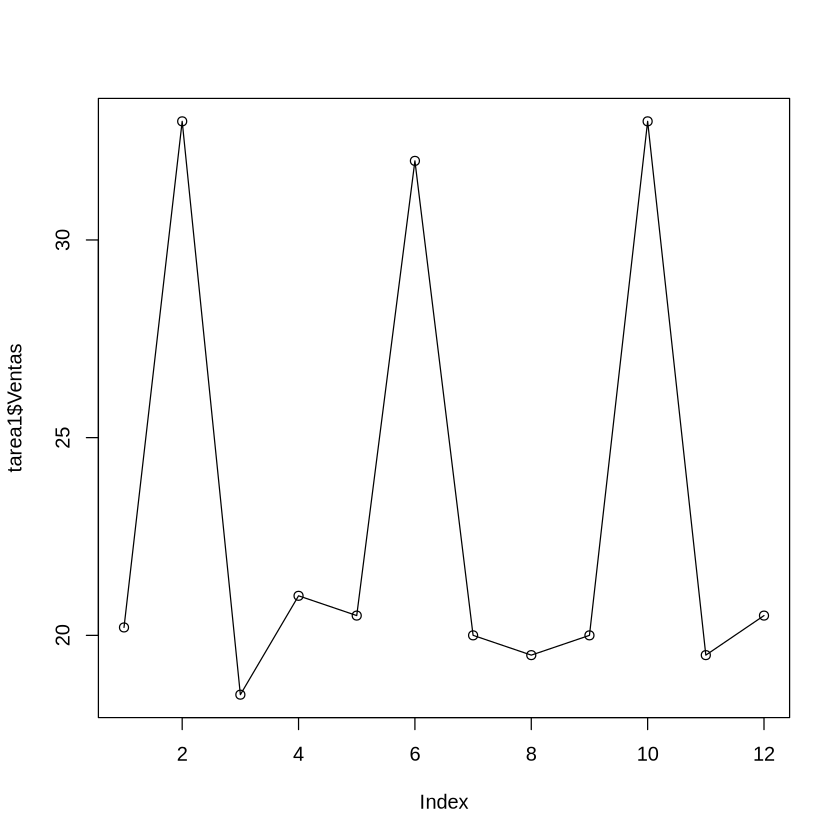

In [33]:
tarea1$Fecha <- paste(tarea1$Año, tarea1$Trimestre, sep = "-")
plot(tarea1$Ventas, type="o")

A juzgar por el grafico, tenemos una serie temporal del Tipo 2, con estacionalidad pero sin tendencia. Por lo que si buscaramos un metodo no parametrico los mejores metodos a usar serian las media mobiles y el metodo ingenuo estacional

#### 2. ¿Por qué? ¿Qué te permite tomar esta decisión?

Porque tal y como he mencionado anteriormente, observamos en el grafico que nuestra serie temporal es una sin tendencia pero con estacionalidad, es decir, de tipo 2.

#### 3. Calcula las predicciones para ambos métodos y genera el gráfico donde se aprecien la serie original y las predicciones en el período. 

##### Metodo ingenuo estacional

In [34]:
tarea1 <- rbind(tarea1, tail(tarea1, 4))

In [35]:

tarea1$Fecha <- paste(tarea1$Año, tarea1$Trimestre, sep = "-")
tarea1$Inge <- tarea1$Ventas
for (x in 1:4) {
    tarea1$Inge[x] = NA
    tarea1$Ventas[x + 12] = NA
}
for (x in 5:16) {
    tarea1$Inge[x] <- tarea1$Ventas[x -4]
}
print(tarea1)

# A tibble: 16 × 5
     Año Trimestre Ventas Fecha     Inge
   <dbl> <chr>      <dbl> <chr>    <dbl>
 1  2021 I           20.2 2021-I    NA  
 2  2021 II          33   2021-II   NA  
 3  2021 III         18.5 2021-III  NA  
 4  2021 IV          21   2021-IV   NA  
 5  2022 I           20.5 2022-I    20.2
 6  2022 II          32   2022-II   33  
 7  2022 III         20   2022-III  18.5
 8  2022 IV          19.5 2022-IV   21  
 9  2023 I           20   2023-I    20.5
10  2023 II          33   2023-II   32  
11  2023 III         19.5 2023-III  20  
12  2023 IV          20.5 2023-IV   19.5
13  2023 I           NA   2023-I    20  
14  2023 II          NA   2023-II   33  
15  2023 III         NA   2023-III  19.5
16  2023 IV          NA   2023-IV   20.5


##### Metodo medias mobiles

In [57]:
Trim1 <- subset(tarea1, Trimestre == "I")
Trim2 <- subset(tarea1, Trimestre == "II")
Trim3 <- subset(tarea1, Trimestre == "III")
Trim4 <- subset(tarea1, Trimestre == "IV")

In [58]:
tarea1$MedEst <- tarea1$Inge

for (x in 1:3) {
    
    aux = Trim1[1:x,]
    tarea1$MedEst[x*4 + 1] <- mean(aux$Ventas, na.rm = TRUE)
    
    aux = Trim2[1:x,]
    tarea1$MedEst[x*4 + 2] <- mean(aux$Ventas, na.rm = TRUE)
    
    aux = Trim3[1:x,]  
    tarea1$MedEst[x*4 + 3] <- mean(aux$Ventas, na.rm = TRUE)
    
    aux = Trim4[1:x,]    
    tarea1$MedEst[x*4 + 4] <- mean(aux$Ventas, na.rm = TRUE)
}
print(tarea1)

# A tibble: 16 × 6
     Año Trimestre Ventas Fecha     Inge MedEst
   <dbl> <chr>      <dbl> <chr>    <dbl>  <dbl>
 1  2021 I           20.2 2021-I    NA     NA  
 2  2021 II          33   2021-II   NA     NA  
 3  2021 III         18.5 2021-III  NA     NA  
 4  2021 IV          21   2021-IV   NA     NA  
 5  2022 I           20.5 2022-I    20.2   20.2
 6  2022 II          32   2022-II   33     33  
 7  2022 III         20   2022-III  18.5   18.5
 8  2022 IV          19.5 2022-IV   21     21  
 9  2023 I           20   2023-I    20.5   20.4
10  2023 II          33   2023-II   32     32.5
11  2023 III         19.5 2023-III  20     19.2
12  2023 IV          20.5 2023-IV   19.5   20.2
13  2023 I           NA   2023-I    20     20.2
14  2023 II          NA   2023-II   33     32.7
15  2023 III         NA   2023-III  19.5   19.3
16  2023 IV          NA   2023-IV   20.5   20.3


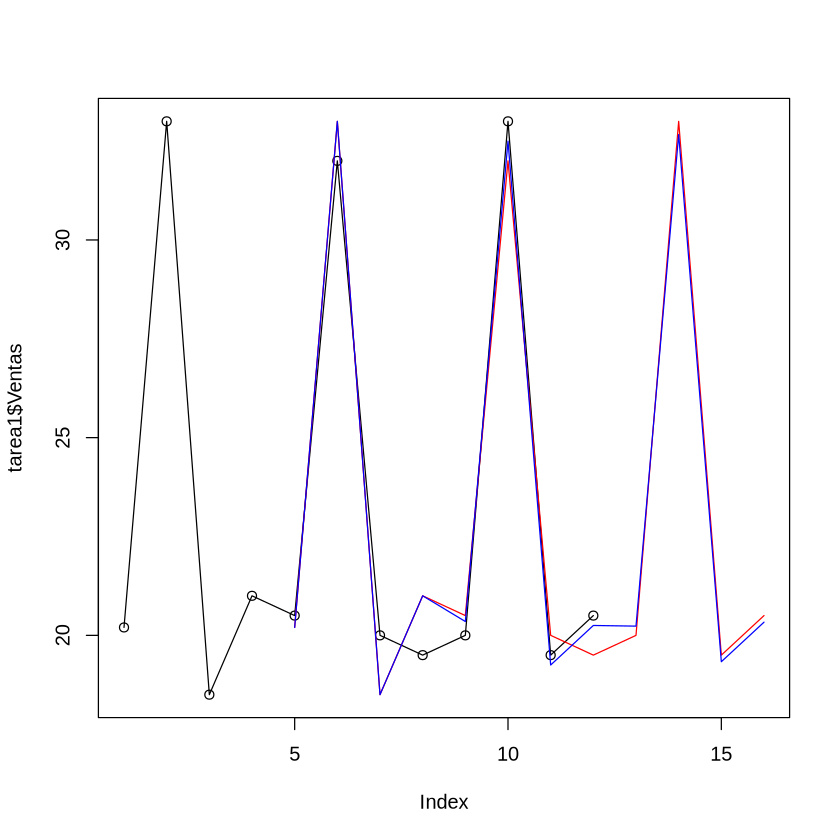

In [63]:
plot(tarea1$Ventas, type="o")
lines(tarea1$Inge, col="red")
lines(tarea1$MedEst, col="blue")


## Tarea 2 (en el excel)

#### 3. Calcula el EAM y el ECM y discute su capacidad predictiva. 

**ECM:0.970** 
**EAM:0.826**

A juzgar por los resultados se puede apreciar como las predicciones son bastante acertadas con unos errores menores a 1 unidad cuando las predicciones estan alrededor de las 13.

## Tarea 3

a = 0.5, γ =0.3 i δ= 0.7.

Los calculos se harán con la suposición de que se nos esta pidiendo una predicción extramuestral.

B(2002.7) = 0.7 * (T(2002.7 - T(2002.6)) + 0.3 * B(2002.6) = 0.7*(2.7 - 2.18) + 0.3 * (-0.08) = **0.34**

Y(Agosto) = T(2002.7) + B(2002.7) + S(2001.8) = 2.7 + 0.34 + 57.4 = **60.44**

Y(Septiembre) = T(2002.7) + B(2002.7)*2 + S(2001.9) = 2.7 + 0.34 * 2 + 41.7 = **45.08**

Y(Octubre) = T(2002.7) + B(2002.7)*3 + S(2001.10) = 2.7 + 0.34 * 3 + 35.3 = **39.02**